# Hands-on 04: Operações importantes com sinais 

# Objetivos
As metas desse tutorial são ajudar o usuário a:
- Fazer uma breve revisão sobre processos estocásticos e medidas relacionadas usando Python;
- Fazer uma breve revisão sobre cálculo de potência e energia de um sinal (seu significado e seu cálculo) usando Python;
- Fazer uma aplicação prática com a autocorrelação (remoção de eco)  usando Python.

# Sinal e processos estocásticos

Processos estocásticos são uma extensão do conceito de variável aleatória, compreendendo o espaço amostral, o conjunto de sinais e as funções densidade de probabilidade associadas.  Uma definição mais objetiva de processos estocásticos é: 

**Fenômeno que varia em algum grau, de forma imprevisível, à medida que o tempo passa.**

Assim, um processo estocástico está inerentemente ligado a observação no tempo de uma variável aleatória. Podemos citar como exemplos de processos estocásticos:   

- Variação do tráfego em um cruzamento;
- Variação diária no tamanho do estoque de uma empresa;
- Variação minuto a minuto do índice IBOVESPA;
- Variação no estado de um sistema de potência;
- Variação no número de chamadas feitas a uma central telefônica;
- Sinais aleatórios em geral que dependem do tempo.

Para analisar o processo estocástico é preciso especificar o período de tempo $T$ envolvido quando ele será observado.
- Se $T$ é contínuo, $T = \{t: 0 \leq t \leq \infty \}$: Trata-se de um Processo Estocástico de Parâmetros
Contínuos (e.g., um Processo de Poisson);
- Se $T$ é discreto, $T = \{0, 1, 2, ...\}$: Trata-se de um Processo Estocástico de Parâmetros Discretos (e.g., Séries Temporais em geral).

Além da função densidade de probabilidade (densidade de primeira ordem), um processo estocástico pode ser completamente determinado pelas suas distribuições de ordem $n$. Contudo, em uma grande parcela de aplicações, somente certas médias são usadas, em particular, o valor esperado de $x(t)$ e $x^2(t)$. Essas quantidades podem ser expressas como **propriedades de segunda-ordem de $x(t)$**, definidas como: **Média**, **Autocorrelação** e **Autocovariância**.   

# Definições importantes sobre processos estocásticos

## Esperança, autocorrelação e autocovariância

(Se você experimentar problemas com a visualização de equações desse notebook, use o NBviewer pelo [link](http://nbviewer.jupyter.org/github/vicentesousa/DCO2004_2022/blob/main/notebooks/h04_python.ipynb)). 

A **média** $\mu(t)$ é definida como o valor esperado (esperança) de $x(t)$ da seguinte forma:

$$\mu(t) = E\{x(t)\} = \int_{-\infty}^{\infty}xf(x,t)dx$$

sendo $f(x,t)$ a função distribuição de $x(t)$ (sua densidade de primeira-ordem), e $x(t)$ uma variável aleatória contínua.

Para uma variável aleatória discreta, temos que 

$$E\{x(t)\} = \sum_{i}x_ip_i$$

sendo $p_i = P\{ x = x_i\}$

Um caso especial bem conhecido acontece quando as probabilidades $p_i$ são iguais, independente do valor de $i$, e o número de valores observáveis é finito, resultando na média aritmética: 

$$E\{x(t)\} = \frac{1}{N}\sum_{i=1}^{N}x_i$$

A **autocorrelação** ${R}_{xx}$ de um sinal aleatório descreve a dependência entre valores de amostras em instantes distintos. Ela pode ser usada para encontrar padrões de repetição em tais sinais (não aleatoriedades), por exemplo, identificar uma frequência fundamental, implícita pelas suas frequências harmônicas.  A autocorrelação é uma medida que informa o quanto o valor de uma realização de uma variável aleatória é capaz de influenciar seus vizinhos. Por exemplo, o quanto a existência de um valor mais alto condiciona valores também altos de seus vizinhos.

Define-se a autocorrelação de um processo aleatório contínuo (e.g. um sinal de voz), como:

$$R(t_1, t_2)= E\{x(t_1)x(t_2)\} = \int_{-\infty}^{\infty}\int_{-\infty}^{\infty} x_1x_2f(x_1, x_2; t_1, t_2)dx_1dx_2$$

Por se tratar da análise de relação entre um sinal e ele mesmo, podemos ter diversas aplicações em telecom, tais como:

- Detecção de sinais;
- Detecção de atraso em sinais (cancelamento de eco);
- Atraso entre sinais recebidos por sensores em posições diferentes;
- Detecção de padrões de sinalização conhecidos (e.g. detecção de preâmbulo);
- Determinação da frequência e potência de um sinal;
- Predição de séries temporais.

Como a autocorrelação é uma medida estatística não vinculada a uma área de aplicação específica, trabalhos em outras áreas bem diferentes de telecomunicações podem ser achados em grande quantidade, tais como:

- AUTOCORRELAÇÃO ESPACIAL NA ÁREA DE LOJA DE SUPERMERCADOS NOS MUNICÍPIOS PAULISTAS ([link](http://www.scielo.br/pdf/rae/v39n4/v39n4a05));
- MODELAGEM DA AUTOCORRELAÇÃO RESIDUAL PELO MÉTODO DOS MÍNIMOS QUADRADOS GENERALIZADOS COM APLICAÇÃO AO MERCADO DE CARNE DE FRANGO ([link](http://dspace.bc.uepb.edu.br/jspui/bitstream/123456789/7096/1/PDF%20-%20Ianne%20Porfirio%20de%20Queiroz.pdf)).

Assim como a autocorrelação, a **autocovariância** também é uma medida de relação linear entre variáveis aleatórias tomadas de um processo estocástico em tempos distintos ($t_1$ e $t_2$), e pode ser definida como:

$$C_{xx}(t_1, t_2) = R(t_1, t_2) - \mu(t_1)\mu(t_2)$$

A autocovariância mede a tendência da distribuição de probabilidade conjunta de $x(t_1)$ e $x(t_2)$. Assim, tanto a autocorrelação como a autocovariância medem como duas variáveis aleatórias, $x(t_1)$ e $x(t_2)$, de um processo estocástico variam conjuntamente (as duas crescem, descrescem ou tem relação inversa ao longo do tempo?).

Como veremos posteriormente, a autocorrelação está intimamente ligada com a medida de potência de um sinal, enquanto a autocovariância está mais ligada a medida de correlação do sinal.

## Independência 

Independência estatística é o conceito relacionado com a influência entre duas variáveis aleatórias. Se nenhuma informação sobre uma variável aleatória $x$ pode ser extraída ao observar um variável $y$, elas são multualmente independentes. O conceito de dependência (e independência) é uma associação mais geral entre duas variáveis aleatórias, a dependência pode acontecer em duas circunstâncias: (i) quando $x$ causa $y$, e vice-versa; e (ii) quando ambos $x$ e $y$ são influenciados pela mesma causa.

Podemos testar independência estatística entre $x$ e $y$ usando:

- Probabilidade conjunta: $P\{x \in A, y \in B\} = P\{x \in A\} P\{y \in B\}$
- Probabilidade condicional: $P\{x \in A | y \in B\} = P\{x \in A\}$
- Função densidade de probabilidade conjunta: $f(x,y) = f_x(x)f_y(y)$.

Por sua vez, dois processos estocásticos $x(t)$ e $y(t)$ são **independentes** quando as variáveis aleatórias $x(t_1)$, $x(t_2)$, ..., $x(t_n)$ e $y(t_1)$, $y(t_2)$, ..., $y(t_n)$ são multuamente independentes.

Em geral, as variáveis aleatórias $x(t_1)$ e $x(t_2)$ do processo estocástico $x(t)$ são estatisticamente dependentes para qualquer tempos $t_1$ e $t_2$. Contudo, em muitos casos, essa dependência decresce com $\left |  t_1 - t_2 \right |  \rightarrow  \infty$. Isso leva a seguinte definição:

> Um processo estocástico é chamado **a-dependente** se todos seu valores x(t) para $t < t_o$ e para $t > t_o + a$ são multuamente independentes. Isso resulta em $C_{xx}(t_1, t_2) = 0$, para $\left |  t_1 - t_2 \right |  > a$. Como consequência, qualquer combinação linear de seus valores para $t < t_o$ será descorrelacionada com seus valores para $t > t_o + a$. 

## Correlação, ortogonalidade e ruído branco

Precisamos distinguir os conceitos de independência e descorrelação. Enquanto independência é um conceito mais geral (uma variável que influencia na outra), a correlação é um conceito mais específico. Duas variáveis são correlacionadas quando mostram tendência relacionadas de aumento ou queda.

Dois processos estocásticos $z(t)$ e $w(t)$ são chamados de **descorrelacionados** se $C_{zw}(t_1, t_2) = 0$. A descorrelação implica que ao tomarmos duas variáveis aleatórias $z(t_1)$ e $w(t_2)$, $E\{z(t_1)w(t_2)\} = E\{z(t_1)\}E\{w(t_2)\}$.

Eles são chamados **multuamente ortogonais** se $R_{zw}(t_1, t_2) = 0$. A ortogonaliade implica que ao tomarmos duas variáveis aleatórias $z(t_1)$ e $w(t_2)$, $E\{z(t_1)w(t_2)\} = 0$.

**Ruído branco (white noise):** Podemos dizer que um processo $v(t)$ é um ruído branco se seus valores $v(t_i)$ e $v(t_j)$ são descorrelacionados para cada $t_i$ e $t_j$, com $t_j \neq t_i$, i.e, $C_{xx}(t_i, t_j) = 0$. Outra forma de escrever isso é $C_{xx}(t_i, t_j) = q(t_j)\delta(t_j-t_i)$, com $q(t)>0$.

**Sinal IID (Independent and Identically distributed)**: além de independetes, os sinais IID são identicamente distribuídos, resultando em:

$$f_x(x(t_1), x(t_2), ..., x(t_n)) = f_x(x(t_1)) f_x(x(t_2)) ... f_x(x(t_n))$$

Neste caso, supondo $\mu_x = 0$,

$$R_{xx}(t_i, t_j) = E\{ x(t_i)x(t_j)\} = \sigma_x\delta(\tau)$$

## Correlação vs independência estatística

Resumindo temos:

- **Independência estatística** é relacionada diretamente com um significado na teoria da probabilidade, que estabelece que nenhum conhecimento sobre uma variável aleatória será revelado ao se conhecer um subconjunto de uma segunda variável aleatória independente;

- Já **correlação** é uma medida de relação linear entre variáveis aleatórias. Variáveis aleatórias independentes tem correlação igual a zero. Contudo, é possível que variáveis com correlação zero não sejam independentes. **Correlação não implica relação de causa!!!**

- Por outro lado, se duas variáveis são correlacionadas (correlação diferente de zero), elas certamente não são independentes. Isso se explica também partindo do princípio que a correlação é uma medida da relação linear entre duas variáveis. Se duas as variáveis apresentam dependência não-linear, elas podem ter correlação zero e mesmo assim serem dependentes, pois a medida de correlação pode não ser sensível a dependência não-linear. Assim, o conjunto de variáveis aleatórias correlacionadas é um subconjunto das variáveis aleatórias dependentes.

![fig_corr_dep](../FIGS/HD_04/corr_dep.png)

- Um exemplo ilustrativo é: As vendas de sorvete e protetor solar aumentam no verão e caem no inverno, contudo não se pode afirmar que um aumento nas vendas de protetor solar e sorvete causarão verão. 

## Estacionaridade e ergodicidade

Existe um conjunto de sinais que apresentam medidas estatísticas que independem do tempo. Eles são conhecidos como sinais estacionários e são muito úteis, porque permitem manipulação matemática mais simples. Assim, podemos definir:

**Processos SSS**: Um processo estocástico $x(t)$ é chamado de **estacionário no sentido restrito (SSS)** se suas propriedades estatísticas são invariantes para um deslocamento da origem. Isso significa que os processos $x(t)$ e $x(t+c)$ tem as mesmas propriedades estatísticas para qualquer valor de $c$. 

**Processos WSS**: Um processo estocástico $x(t)$ é chamado de **estacionário no sentido amplo (WSS)** se:
- Sua média é constante: $E\{x(t)\} = \mu$; 
- Sua autocorrelação depende somente de $\tau = t_1-t_2$: $R(\tau) = E\{x(t)x(t+\tau)\}$.

Para um processo estocástico WSS de sinais reais, a função autocorrelação é definida como:

$${R}_{xx}(\tau)= \int_{-\infty}^{\infty}x(t) \cdot  x(t+\tau)dt$$

Note que $R_{xx}(\tau)$ é uma função par $\left ( R_{xx}(–\tau) = R_{xx}(\tau) \right )$ de números reais, cujo o valor máximo está em $\tau=0$.

Um problema prático em aplicações da teoria de processos estocásticos é a estimação dos vários parâmetros estatísticos em função dos dados reais medidos. Assim, na prática, não temos disponíveis o real valor do parâmetro (média, variância, autocorrelação, etc), mas sim uma estatística (estimação baseada em amostras) dos parâmetros. **Sinais ergóticos** são aqueles que seus parâmetros estatísticos são bem representados pela estimação amostral. A ergodicidade pode se dar na média, na autocorrelação, ou em relação a outras medidas. 

Vamos tomar o exemplo da média de um sinal discreto como ilustração. Suponha que nós temos $N$ observações estatisticamente independentes da variável aleatória $x$ e queremos estimar sua a média ($m$) por meio do estimador:

$$\mu_e = \frac{1}{N}\sum_{n=1}^{N} x[n]$$

Claramente, $\mu_e$ é um estimador não tendencioso de $m$, pois $E\{\mu_e\} = \frac{1}{N}\sum_{n=1}^{N} E\{x[n]\} =  \frac{1}{N}\cdot mN = m$. 

A ergodicidade pode ser testada ao tomarmos ${\sigma_e}^2$ como a variância do estimador $\mu_e$ (claro, em relação a média de $x(t)$), i.e., a medida de dispersão do estimador em relação a sua média. Se ${\sigma_e}^2 = E\{(\mu_e - m)^2\} \rightarrow 0$ quando $N \rightarrow  \infty$, o processo estocástico é ergótico na média. Para esse exemplo, ${\sigma_e}^2 = E\{(\mu_e - m)^2\} = \frac{\sigma^2}{N}$, satisfazendo a condição de ergodicidade na média (para detalhes do desenvolvimento matemático, ver página 50, seção 2.2.1 de John G. Proakis, Masoud Salehi, John G. Proakis, Modern Communication Systems Using MATLAB, 3rd Edition, CENAGE Learning,2013).

Assim, para estabelecer a ergodicidade de um processo estocástico, é suficiente achar ${\sigma_e}^2$ e examinar que condição ${\sigma_e}^2\rightarrow 0$ quando $N \rightarrow  \infty$.

# Energia e densidade espectral de energia de um sinal

Para um sinal de tempo contínuo x(t), entende-se como **energia** $E_x$ de $x(t)$:

$$E_x = \int_{-\infty}^{+\infty} \left |x(t)\right |^{2}dt$$ 

Energia é uma medida de tamanho do sinal e se pensarmos em uma grandeza que meça a intensidade de um sinal, normalmente vemos um sinal $x(t)$ como uma tensão (ou corrente) em um resistor de 1 ohm. Assim, $E_x$ é a energia que a tensão $x(t)$ dissipa no resistor. Esse medida é especialmente interessante para medir a intensidade de sinais energia (sinais com energia limitada), como por exemplo, para sinais digitais modulados. Outra maneira de ver a formulação acima é entender a energia como a área sob a curva de $\left |x(t)\right |^{2}$.

A **energia** pode ser calculada usando o teorema de Parseval por meio da transformada de Fourier $X(f)$:

$$E_x = \int_{-\infty}^{+\infty} \left |X(f)\right |^{2}df$$ 

Uma das interpretações da formulação acima é que a energia total é resultado das energias contribuídas por todas as componentes espectrais do sinal $x(t)$. Como a contribuição da componente associada a frequência $f_i$ é $\left |X(f_i)\right |^{2}$, podemos definir a **densidade espectral de energia (ESD)** como:

$$\Psi_x(f) = \left |X(f)\right |^{2}$$ 

Assim, podemos escrever a energia como:

$$E_x = \int_{-\infty}^{+\infty} \Psi_x(f) df$$ 

Se $x(t)$ for um sinal real, podemos relacionar autocorrelação com a densidade espectral de energia por meio da transformada de Fourrier, de forma que:

$$ \Psi_x(f) = \mathcal{F}[{R}_{xx}(\tau)]$$

Para sinais discretos no tempo, a energia é definida como:

$$ E_x = T_s\sum_{n=-\infty}^{\infty} \left | x[t] \right |^2$$

Para sinais discretos no tempo, a energia pode ser estimada por meio de $N$ amostras do sinal, como:

$$E_x = T_{s}\sum_{n=0}^{N-1} \left |  x[n]  \right |^{2}, $$

com a amostragem começando no instante $n=0$ e terminando em $n = N-1$.

## Potência e densidade espectral de potência

Para um sinal potência (potência média limitada), uma medida razoável de seu tamanho é a potência média. Potênca média é definida como valor médio da energia do sinal em um intervalo de tempo e pode ser escrita como:

$${P}_x = \lim_{T\rightarrow \infty} \frac{1}{T}\int_{-T/2}^{T/2} \left |x(t)\right |^{2}dt$$

Note que a integral $\int_{-T/2}^{T/2} \left |x(t)\right |^{2}dt$ é a energia de um sinal truncado entre $-T/2$ e $-T/2$, a qual chamaremos de $E_{x_T}$. Assim, podemos escrever:

$${P}_x = \lim_{T\rightarrow \infty} \frac{E_{x_T}}{T}$$

Pelo teorema de Parseval, podemos escrever:

$$E_{x_T} = \int_{-\infty}^{+\infty} \left |x(t)\right |^{2}dt = \int_{-\infty}^{+\infty} \left |X(f)\right |^{2}df$$ 

Portanto, $P_x$, a potência média de $x(t)$, pode ser escrita como:

$${P}_x = \lim_{T\rightarrow \infty} \frac{E_{x_T}}{T} = \lim_{T\rightarrow \infty} \frac{1}{T} \int_{-\infty}^{+\infty} \left |X(f)\right |^{2}df = \lim_{T\rightarrow \infty} \int_{-\infty}^{+\infty} \frac{\left |X(f)\right |^{2}}{T}df$$


Agora podemos definir a **densidade espectral de potência (PSD)** como:

$$S_{x}(f)= \lim_{T\rightarrow \infty}\frac{\left |X(f)\right |^{2}}{T}df$$

Portanto, a potência média é a área sob a curva PSD:

$$P_{x}=\int_{-\infty}^{\infty}S_{x}(f)df$$

A **função autocorrelação temporal** (_time-average autocorrelation function_) de um sinal potência de valores reais $x(t)$ é definida como:

$${R}_{xx}(\tau)=\lim_{T\rightarrow \infty} \frac{1}{T}\int_{-T/2}^{T/2}x(t) \cdot  x(t+\tau)dt$$

Em que $T$ é o período de observação.

Podemos relacionar autocorrelação temporal com a densidade espectral de potência (PSD) por meio da transformada de Fourrier, de forma que:
 
$$S_{x}(f)=\mathcal{F}[{R}_{xx}(\tau)]$$

Uma propriedade importante é a relação entre a potência média do sinal WSS e sua autocorrelação:

$$P_x = R_{xx}(0) = E\{x^2(t)\}$$

Assim, podemos afirmar que a potência média de sinais WSS é o valor máximo da curva de autocorrelação.

Para sinais discretos no tempo, a potência média é defnida como:

$$P = \lim_{N \rightarrow\infty}\frac{1}{2N+1}\sum_{n=-N}^{N} \left |  x[n]  \right |^{2} $$



Para sinais discretos no tempo, a potência pode ser estimada por meio de $N$ amostras do sinal, como:

$$P = \frac{1}{N}\sum_{n=0}^{N-1} \left |  x[n]  \right |^{2}, $$

com a amostragem começando no instante $n=0$ e terminando em $n = N-1$.

## Cálculo (estimativa) da autocorrelação

Para um sinal amostrado, a estimação da autocorrelação pode ser feita como:
 
- Versão biased (com tendência, com viés): 

$$R_{xx}[m]=\frac{1}{N}\sum_{n=1}^{N-m}x[n] \cdot  x[n+m]$$

- Versão unbiased (sem tendência, sem viés): 

$$R_{xx}[m]=\frac{1}{N-|m|}\sum_{n=1}^{N-m}x[n] \cdot  x[n+m]$$

para $m = 0, 1, ..., M$, em que M é o número de atrasos usados na estimação e $N$ o número de amostras do sinal. 

# Prática 1: Cálculo da autocorrelação


Para calcular a autocorrelação de um sinal amostrado não será necessário integrações, pois no tempo discreto sua formulação depende de um somatório. Portanto, usaremos a fórmula de autocorrelação discreta para calcular $R_{xx}(m)$. 


**Passo 01:** Abra um script no VS Code, salve-o como **handson4_1.py** e escreva o seguinte código:

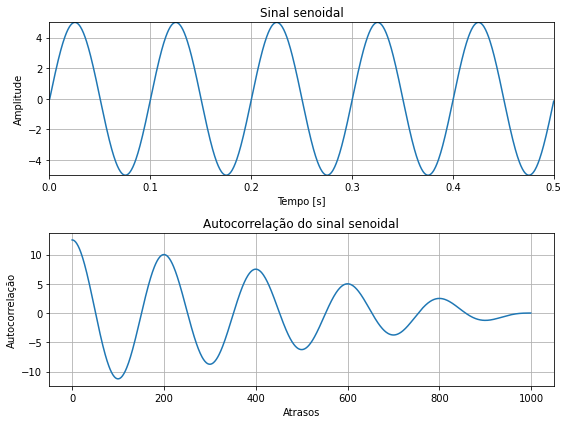

In [2]:
import numpy as np
from matplotlib import pyplot as plt
M =1000                                # Número de atrasos
N =1000                                # Número de amostras
f1=10                                  # Frequência do seno (kHz)
Fs=2000                                # Frequência de amostragem (kHz)
n =np.arange(0,N)                      # Vetor com índices de amostra
Am=5                                   # Determina a amplitude
x=Am*np.sin(2*np.pi*f1*n/Fs)           # Gera o sinal x(n)
t=np.arange(1,N+1)*(1/Fs)              # Definiçao do eixo do tempo
#implementaçao:
def xcorr(sinal):
    N = len(sinal)
    rxx = np.zeros([N],dtype = float)
    for m in range(N):
        for n in range(N-m):
            rxx[m] = rxx[m]+x[n]*x[n+m]
    rxx = rxx/N
    return rxx
Rxx = xcorr(x)
#Plotagem:
plt.figure(1,[8,6])
#Plota x[n]
plt.subplot(211)
plt.title("Sinal senoidal")
plt.ylabel("Amplitude")
plt.xlabel("Tempo [s]")
plt.grid()
plt.axis([0,0.5,-5,5])
plt.plot(t,x)
#Plota Autocorrelação
plt.subplot(212)
plt.plot(Rxx)
plt.xlabel("Atrasos")
plt.ylabel("Autocorrelação")
plt.title("Autocorrelação do sinal senoidal")
plt.grid()

plt.tight_layout()
plt.show()

Podemos observar que o gráfico de autocorrelação tem valor descrescente ao longo do atraso, mostrando a perda de correlação ao longo do tempo.

**Passo 2:** Sabemos que a potência média é o valor de $R_{xx}(0)$. Assim, vamos inspecionar o gráfico de autocorrelação e verifique a potência média do sinal. Digite no _Console IPython_ o seguinte comando:

In [3]:
Rxx[0]

12.499999999999996

Note que sse valor é exatamente $\frac{Am^2}{2} = \frac{5^2}{2} =$ 12,5.

# Prática 2: Função do Python para o cálculo da autocorrelação

A função obtida na **Prática 1** mostra a autocorrelação do sinal $x(t)$ para valores de $m$ positivos. No Python, a função **np.correlate($\cdot$)** produz uma estimativa da correlação entre duas sequências aleatórias ou a própria autocorrelação. Note que a **np.correlate($\cdot$)** encontra a autocorrelação quando as duas sequências passadas como parâmetros são as mesmas, como será mostrado em seguida. 

**Passo 01:** Abra um script no VS Code, salve-o como **handson4_2.py** e escreva o seguinte código:

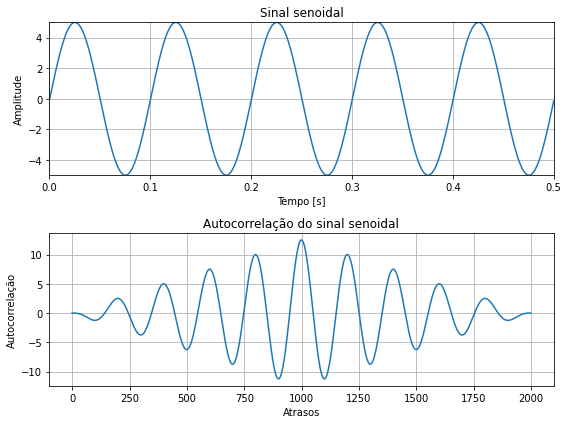

In [2]:
import numpy as np
from matplotlib import pyplot as plt
M =1000                                # Número de atrasos
N =1000                                # Número de amostras
f1=10                                  # Frequência do seno (kHz)
Fs=2000                                # Frequência de amostragem (kHz)
n =np.arange(0,N)                      # Vetor com índices de amostra
Am=5                                   # Determina a amplitude
x=Am*np.sin(2*np.pi*f1*n/Fs)           # Gera o sinal x(n)
t=np.arange(1,N+1)*(1/Fs)              # Definiçao do eixo do tempo

Rxx = np.correlate(x,x,'full')/len(x)
#Plotagem:
plt.figure(1,[8,6])
#Plota x[n]
plt.subplot(211)
plt.title("Sinal senoidal")
plt.ylabel("Amplitude")
plt.xlabel("Tempo [s]")
plt.grid()
plt.axis([0,0.5,-5,5])
plt.plot(t,x)
#Plota Autocorrelação
plt.subplot(212)
plt.plot(Rxx)
plt.xlabel("Atrasos")
plt.ylabel("Autocorrelação")
plt.title("Autocorrelação do sinal senoidal")
plt.grid()

plt.tight_layout()
plt.show()

Note que a função aucorrelação obtida na **Prática 2* mostra a autocorrelação do sinal $x(t)$  centrada no zero. Assim, a função **np.correlate($\cdot$)** retorna o dobro do número de amostras do sinal $x(n)$. Como esperado, o gráfico acima estima a autocorrelação com $N$=1000 amostras, dessa forma se assemelhando ao gráfico do código feito usando a função implementada (**Prática 1**).

# Prática 3: Cálculo de potência média

Visto que o Python não possui, na NumPy ou na SciPy, uma função que calcule a potência média de um sinal (equivalente a **bandpower()** do Matlab), podemos implementar o cálculo de potência das seguintes maneiras:
- **No tempo:** $P = \frac{1}{N}\sum_{n=0}^{N-1} \left |  x[n]  \right |^{2} $

- **Na frequência:** $P = \sum_{n=0}^{N-1} \left |X[k]\right |^{2} $

- **Pela autocorrelação**: $P = R_{xx}(0)$, em que $R_{xx}(0)$ é a função autocorrelação.

- **Pela variância**: $P = E[x^2] = {\mu_x}^2 + {\sigma_x}^2 $. Um sinal senoidal tem média zero, pois possui ciclos positivos e negativos simétricos. Então, a variância corresponde exatamente à potência do sinal.

**Passo 01**: Abra um script no VS Code, salve-o como **handson4_3.py** e escreva o seguinte código:

In [6]:
import numpy as np
import time
## Parâmetros do sinal 
fc=0.04                              # Frequência do seno
Fs=1                                 # Frequência de amostragem
Ts = 1/Fs                            # Tempo entre amostras
A = 10                               # Amplitude do sinal
nC = 2000                            # Número de períodos da onda   
t=np.arange(0,nC/fc,Ts)              # Vetor tempo
x=A*np.cos(2*np.pi*fc*t)             # Gera o sinal x(n)
N = len(x)                           # Número de amostras do sinal
sT1 = time.time()
Px_tempo =(np.linalg.norm(x)**2)/N   # Cálculo da potência no tempo
print('Potência via amostras no tempo = ',Px_tempo,time.time()-sT1,' segundos para calcular.')

sT2 =time.time()
Nfft = 1000                          # Número de pontos da FFT
Xfft=np.fft.fft(x,Nfft)              # Encontra a FFT
Xfft = Xfft/Nfft                     # Encontra a FFT 
Px_fft = np.sum(Xfft*np.conj(Xfft))  # Cálculo da potência na frêquencia
print('Potência via FFT (Parseval) = ',abs(Px_fft),time.time()-sT2,' segundos para calcular.' )

sT3 =time.time()
Rxx=np.correlate(x,x,'full')/len(x)  # Estima a autocorrelaçao de x(n)
Px_Rxx = Rxx[N-1]                    # Cálculo da potência duas bandas via autocorrelação
print('Potência via autocorrelação = ',Px_Rxx,time.time()-sT3, ' segundos para calcular.' )

sT4 =time.time()
Pvar = np.var(x)                     # Cálculo da potência duas bandas via variancia
print('Potência via variância = ',Pvar,time.time()-sT4,' segundos para calcular.' )

Potência via amostras no tempo =  50.00000000000001 0.001432180404663086  segundos para calcular.
Potência via FFT (Parseval) =  50.0 0.0006883144378662109  segundos para calcular.
Potência via autocorrelação =  50.0 0.5175602436065674  segundos para calcular.
Potência via variância =  50.00000000000001 0.0003120899200439453  segundos para calcular.


Observe as várias maneiras de estimar a potência resultaram em valores similares, contudo, em tempos de execução diferentes. 


**Passo 2:** Mude a variável **_nC_** para 20000 e veja o que acontece com a imprecisão do cálculo da potência e com o tempo para calcular. 

# Prática 4: Cálculo de potência média

Outra maneira de estimar a potência de um sinal é via PSD. Existem várias maneiras de estimar a PSD de um sinal por meio de um conjunto de suas amostras. Esse experimento explorará o periodograma.

**Passo 01:** Abra um script no VS Code, salve-o como **handson4_4.py** e escreva o seguinte código:

A potência máxima ocorre em  0.04  Hz
A potência estimada é 50.00000000001062


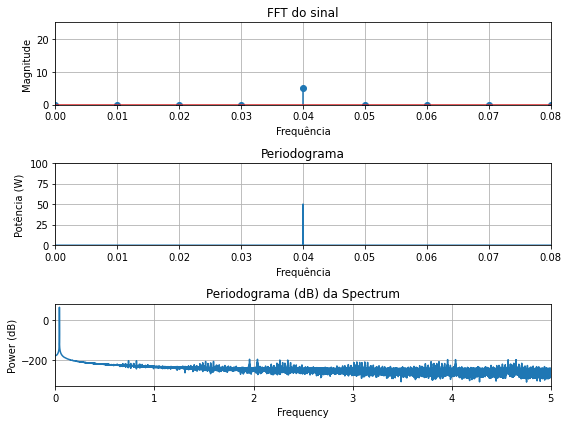

In [1]:
import scipy.signal as sci
import numpy as np
import matplotlib.pyplot as plt
## Parâmetros do sinal 
fc=0.04                              # Frequência do seno
Fs=10                                # Frequência de amostragem
Ts = 1/Fs                            # Tempo entre amostras
A = 10                               # Amplitude do sinal
nC = 2000                            # Número de períodos da onda   
t=np.arange(0,nC/fc,Ts)              # Vetor tempo
x=A*np.cos(2*np.pi*fc*t)             # Gera o sinal x(n)
N = len(x)                           # Número de amostras do sinal

Nfft = 1000
Xfft=np.fft.fft(x,Nfft)              # Encontra a FFT
Xfft = np.array_split(Xfft,2)[0]
f=np.arange(0,0.5*Fs,Fs/Nfft)        # Eixo da frequência
plt.figure(1,[8,6])
plt.subplot(311)
plt.stem (f,abs(Xfft)/Nfft)          # Plota a espectro
plt.title('FFT do sinal')            # Configura título
plt.xlabel('Frequência')
plt.ylabel('Magnitude')
plt.grid()
plt.axis([0,2*fc,0,A**2/4])          # Zoom no gráfico


from spectrum.window import Window
hamming = Window(len(x),name='hamming')
f,pxx = sci.periodogram(x,window=hamming.data,fs=Fs,nfft=len(x),scaling='spectrum')
pwrest = pxx.max()
idx = pxx.argmax()

plt.subplot(312)
plt.plot(f,pxx)
plt.title('Periodograma')
plt.xlabel('Frequência')
plt.ylabel('Potência (W)')
plt.grid()
plt.axis([0,2*fc,0,A**2])

print('A potência máxima ocorre em ',f[idx],' Hz')
print('A potência estimada é',pwrest)

plt.subplot(313)
#construindo todo o procedimento com as funções da spectrum
import spectrum as spec 
data = spec.data_cosine(N=len(x), A=10, sampling=Fs, freq=fc)
p = spec.Periodogram(x, sampling=Fs,window='hamming')
p.run() #Recomputa a psd caso 'x' tenha sido alterado
p.plot()
plt.title("Periodograma (dB) da Spectrum")

plt.tight_layout()
plt.show()

Observe as várias maneiras de estimar a potência resultaram em valores similares. Talvez você perceba que há um pequeno erro na potência calculada pela variância devido ao número de amostras da senoide. Quanto maior o número de amostras $N$, mais preciso é o cálculo da potência, pois mais próximo de zero será a média.


Verifique a correspondência dos gráficos de magnitude e potência com o [cálculo em Matlab](http://www.gaussianwaves.com/2013/12/computation-of-power-of-a-signal-in-matlab-simulation-and-verification/) ilustrada nas figuras abaixo.

![fig_seno_tempo_freq](../FIGS/HD_04/seno_tempo_freq.png)

![fig_seno_pot](../FIGS/HD_04/seno_pot.png)

No Matlab, o periodograma devolve o valor total da potência na banda positiva do sinal!!! é o mesmo no Python?

**Exercício 01 (para o relatório):** Construa um código para gerar uma onda modulada em FM (procure exemplos na Internet). Faça o cálculo de potência de uma onda modulada FM. Observe e discuta os resultados. Verifique se o seu resultado é coerente com a teoria.


# Prática 5: Removendo eco com a autocorrelação

Como a autocorrelação trata-se de quanto a onda se relaciona com ela mesma, podemos localizar eco no sinal recebido e posteriormente filtra-lo. Esse experimento faz uma demonstração simples de como isso pode ser implementado. Este experimento foi baseado em [Borges, 2007](../MATERIAL/HD_04_MATERIAL/SS_Lab_3_versao_b_2007_8_sem_2.pdf) e [Matlab xcorr help](https://www.mathworks.com/help/signal/ref/xcorr.html).

Os seguintes passos serão feitos:

1. Abrir um arquivo de som;
2. Estender o tamanho do arquivo de som para inserção do eco. Faremos isso para colocar o eco completo no som original. Por exemplo, se temos um áudio de 5 segundos e queremos colocar um eco com atraso de 1 segundo, então áudio final estendido terá tamanho de 6 segundos. Matematicamente, temos:
$$y[n] = x[n]+\alpha x[n-N]$$
sendo $y[n]$ o sinal com eco, $x[n]$ o sinal de áudio original, $\alpha$ um coeficiente de atenuação do sinal de eco e o termo x[n-N] representa o sinal de eco com um atraso de $N$ amostras.
3. De posse de y[n], vamos encontrar o atraso que o eco se localiza, i.e., o começo do eco. Para isso calcularemos a autocorrelação. Ela exibirá um pico onde o sinal começa a se  repetir (começo do eco). Para achar o atraso ($N$) correspondente a tal pico, usaremos a função _findpeaks()_;
4. De posse do atraso que começa o eco,  filtraremos o sinal estendido com um filtro de modelo inverso ao do sistema, o qual obedece a seguinte equação:
$$z[n]+\alpha z[n-N] = y[n]$$
sendo z[n] a nova saída do sistema, idealmente sem a presença de eco. O sistema de remoção de eco é ligado em cascata ao 
sistema de eco, tal como ilustrado na figura a seguir. 

![fig_eco](../FIGS/HD_04/eco.png)


**Passo 01:** Nessa etapa, será necessário obter alguma funcionalidade relacionada a deteccção de picos. Precisaremos instalar um pacote no Python para essa finalidade. Para tal, digite os seguintes comandos em um terminal:
```bash
cd ~
git clone https://bitbucket.org/lucashnegri/peakutils.git
cd peakutils/
python setup.py install
```
Com o pacote PeakUtils (© 2014 - 2017, Lucas Hermann Negri) instalado, poderemos encontrar o pico desejado na autocorrelação para saber onde o eco se localiza.

**OBSERVAÇÃO 1:** Caso esteja em algum ambiente virtual e o VS Code não venha a reconhecer o pacote instalado, saia do ambiente digitando o seguinte comando em um terminal:
```bash
source deactivate py385
```
Instale o pacote como ensinado acima.

Depois da instalação, volte para o ambiente digitando o seguinte comando em um terminal:
```bash
source activate py385
```
**OBSERVAÇÃO 2:**Se ainda sim não funcionar, copie a pasta **"peakutils"** que irá se encontrar na sua **home** para o diretório **"/home/seuusuario/anaconda3/envs/py34/lib/python3.4/site-packages"**.

**Passo 02:** Abra um script no VS Code, salve-o como **handson4_5.py** e escreva o seguinte código (cuidado para indicar o endereço correto do arquivo de som):

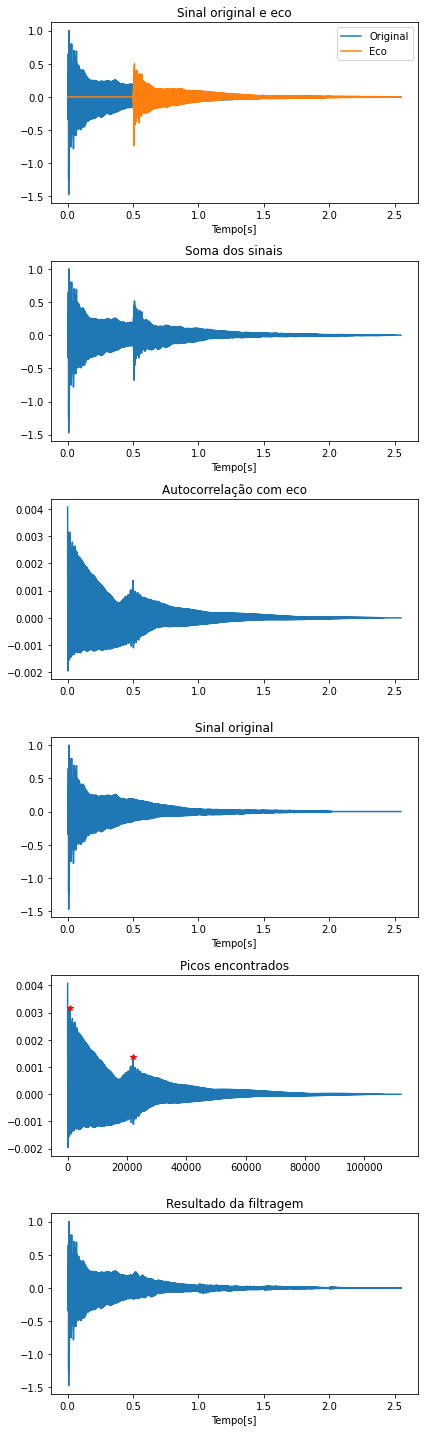

In [1]:
import numpy as np
import scipy.io.wavfile as wv
import sounddevice as sd

#Geração de eco a partir de uma amostra de som
alfa = 0.5
fs, x = wv.read('../MATERIAL/HD_02_PYTHON/sound_01.wav')
timelag = 0.5                                                 
delta = round(fs*timelag)     
eco = np.zeros(len(x)+delta) 
eco[delta:] = alfa*x 
x_eco = np.zeros(len(eco))
x_eco += eco
x_eco[:len(x)] += x
t = np.linspace(0,len(x_eco)/fs,len(x_eco))

#Geração do sinal com zeros adicionados para visualização
x = np.concatenate((x,np.zeros(delta)),axis=0) #padding

#Valor normalizado autocorrelação:
autocorrelacao = np.correlate(x_eco,x_eco,'full')/len(x_eco) 
autocorrelacao = autocorrelacao[len(autocorrelacao)//2:]/1e9 
#Dividir por 10^9 foi opcional

#Detecção dos picos:
lags = np.linspace(0,len(autocorrelacao)-1,len(autocorrelacao))
import peakutils
indexes = peakutils.indexes(autocorrelacao,thres=0.4,min_dist=20000)
#local do eco : menor pico, mais distante (maior índice)
newdelta = max(indexes)
#a peakutils não é perfeitamente igual a 'findpeaks' do matlab
denominador = np.zeros(newdelta+1) 
denominador[0] = 1
denominador[-1] = alfa 
#índice -1 representa o último elemento
#denominador é o [1 zeros(1,newdelta-1) alfa]

#Filtragem:
from scipy import signal
x_new = signal.lfilter([1],denominador,x_eco)

#Plotagem dos resultados:
from matplotlib import pyplot as plt

plt.figure(1,[6,20])

plt.subplot(611)

plt.plot(t,x/max(x))
plt.plot(t,eco/max(x))
plt.title("Sinal original e eco")
plt.xlabel("Tempo[s]")
plt.legend(["Original","Eco"])

plt.subplot(612)

plt.plot(t,(x+eco)/max(x))
plt.title("Soma dos sinais")
plt.xlabel("Tempo[s]")

sd.play((x+eco)/max(x),fs)          # Toca o sinal original + Eco
sd.wait()

plt.subplot(613)

plt.plot(t,autocorrelacao)
plt.title("Autocorrelação com eco")

plt.subplot(614)
plt.plot(t,x/max(x))
plt.title("Sinal original")
plt.xlabel("Tempo[s]")

sd.play(x/max(x),fs)                       # Toca o sinal original
sd.wait()

plt.subplot(615) 

plt.title("Picos encontrados")
plt.plot(lags,autocorrelacao)
plt.plot(indexes,autocorrelacao[indexes],'r*')

plt.subplot(616)

plt.title("Resultado da filtragem")
plt.plot(t,x_new/max(x))
plt.xlabel("Tempo[s]")

sd.play(x_new/max(x),fs)                   # Toca o sinal filtrado

plt.tight_layout()
plt.show()

O código mostra os seguintes gráficos:
1. Áudio original vs Áudio com eco. Nesse gráficos podemos notar o valor de lag (atraso do eco) em 0,5 segundos; 
2. Autocorrelação do áudio com eco. Podemos visualizar um pico repentino de autocorrelação em 0,5;
3. Áudio original vs Áudio filtrado (sem eco novamente).

O script toca o som original, o som com eco e o som com eco removido.

# Bibliografia

Documentação da função xcorr do Matlab (https://www.mathworks.com/help/signal/ref/xcorr.html).

José Borges,Instituto Superior Técnico- Lisboa, 3º Laboratório de Sistemas e Sinais (https://fenix.tecnico.ulisboa.pt/downloadFile/3779571655686/SS_Lab_3_2007_08.pdf).

S R Taghizadeh, Digital Signal Processing - Part 3 - Discrete-Time Signals & Systems Case Studies (http://aparate.elth.ucv.ro/POPA/Matla/matlabsignal.pdf).	

Marcelo Menezes Reis, PROCESSOS ESTOCÁSTICOS, Definições, Principais Tipos, Aplicações em Confiabilidade de Sistemas e Sinais (http://www.inf.ufsc.br/~marcelo.menezes.reis/Processos01.pdf)

Sílvio A. Abrantes, DEEC/FEUP, Função de autocorrelação e 
densidade espectral de potência (http://paginas.fe.up.pt/~sam/CCD/apontamentos_SS/Fun%E7%E3o_Autoc.pdf)

Mathuranathan Viswanathan, Computation of Power of a Signal in Matlab – Simulation and Verification (http://www.gaussianwaves.com/2013/12/computation-of-power-of-a-signal-in-matlab-simulation-and-verification/)

Documentação da função periodogram do Matlab (https://www.mathworks.com/help/signal/ref/periodogram.html)

John G. Proakis, Masoud Salehi, John G. Proakis, Contemporary Communication Systems Using MATLAB, 3rd Edition, CENAGE Learning,2013.